#  Feature engineering: Feature correlation, normality and MIC

## Use case: Linear models for predicting success in marketing campaigns
Dependencies: 
-http://minepy.readthedocs.io/en/latest/
minepy - Maximal Information-based Nonparametric Exploration — 

In [16]:
import pandas as pd
import numpy as np
import seaborn
from sklearn import linear_model
from matplotlib import pyplot as plt
# huge images can't be displayed on a screen, so directly use Agg
import matplotlib
matplotlib.use("Agg")
from scipy import stats
from feature_engineering import feature_engineering

% matplotlib inline
%load_ext autoreload
%autoreload 2


f = feature_engineering()

# Data has blind feature names (unknown), and represents fictional data from a fashion game app
train = pd.read_csv('./data/train_data.csv', header= None)
test = pd.read_csv('./data/test_data.csv', header = None)

col_names = train.columns.values
train.rename(columns=lambda x: str(x), inplace=True)
print col_names
test.rename(columns=lambda x: str(x), inplace=True)

train.head(5)

# make the only categorical feature (row '1') consistent in data types (str)
train['1'] = train['1'].apply(lambda x: str(x)) 
# train = train.set_index(['0'])
# test = test.set_index(['0'])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
feature_engineering methods
[ 0  1  2  3  4  5  6  7  8  9 10 11]


,0,1,2,3,4,5,6,7,8,9,10,11
0,0,AdMob,73946,5755397,2947,12665,46196,639,10091,854301,8875,6680
1,1,Search,1625476,30183332,22443,364010,1287250,4927,44035,5843319,290910,197941
2,2,YouTube,796,170994,140,0,0,41,351,23160,0,0
3,3,AdMob,267791,7184832,5992,79963,270375,1334,13363,1428950,62518,49256
4,4,GDN,1797,98955,39,998,4400,7,110,9484,998,799


In [17]:
test.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,Search,199,194343,63,0,0,40,256,14831,0,0
1,1,AdMob,86869,3558583,885,47151,147847,740,7493,190470,42962,28173
2,2,GDN,1794,117852,16,199,600,20,289,6086,199,199
3,3,Search,0,60852,24,0,0,8,101,4727,0,0
4,4,YouTube,2195,536854,13,1797,8504,101,947,1292,1797,1598


0     5755397
1    30183332
2      170994
3     7184832
4       98955
Name: 3, dtype: int64

0     194343
1    3558583
2     117852
3      60852
4     536854
Name: 3, dtype: int64

83288     2
152772    2
50942     2
51569     2
81140     2
Name: 3, dtype: int64


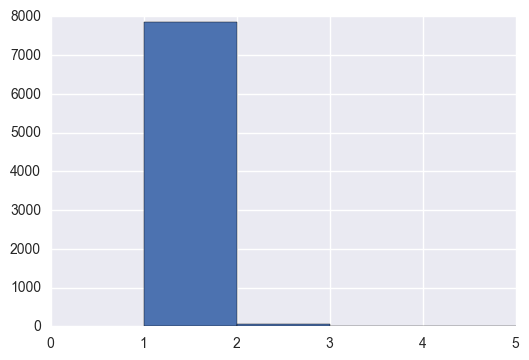

In [18]:
Y_train = train.iloc[:, 3] # equivalent to train[3]   # third column
Y_train.head()
Y_test = test.iloc[:, 3] 
Y_test.head()

## Plotting distribution of the Y variable variablity and different values it contains
# consider first row as data (not header)
y_counts = Y_train.value_counts()
y_counts.hist(bins=[0, 1, 2, 3,4, 5])
print y_counts.head()

In [19]:
mean =  Y_train.mean()
std = Y_train.std()
median = Y_train.median()
print "Feature mean: ", mean
print "Feature std dev: ", std
print "Feature std error of the mean: ", stats.sem(Y_train)
print "Feature median: ", median
# if we were to test normality doing a normal probability plot, we also need:
# train['z-value'] = Y_train - mean
# train['z-value'] = np.divide(train['z-value'], std)

print len(Y_train), " values for Y train -unique: ", len(set(list(Y_train)))
print len(Y_test), " values for Y test -unique: ", len(set(list(Y_test)))

def plot_histogram(data):
    plt.hist(data) #bins=[0, 1, 2, 3,4,5]
    plt.title('Feature histogram')
    plt.xlabel('Y train histogram')
    plt.ylabel('Value count')
    plt.show()

#plot_histogram(Y_train)

Feature mean:  619903.597645
Feature std dev:  2460998.64349
Feature std error of the mean:  27544.0824483
Feature median:  160219.0
7983  values for Y train -unique:  7913
754  values for Y test -unique:  753


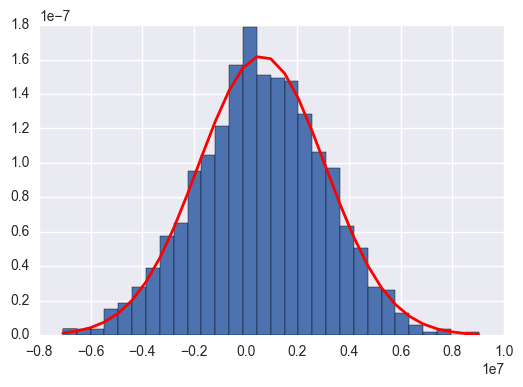

In [20]:
# testing normality
def visualize_normality_with_simulated_normal(mu, sigma, Y_train):
    #mu, sigma = 0, 0.1 # mean and standard deviation
    s = np.random.normal(mu, sigma, 1000)
    #Display the histogram of the samples, along with the probability density function:
    count, bins, ignored = plt.hist(s, 30, normed=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
        np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
    linewidth=2, color='r')
    plt.show()
visualize_normality_with_simulated_normal(mean, std, Y_train)        
        

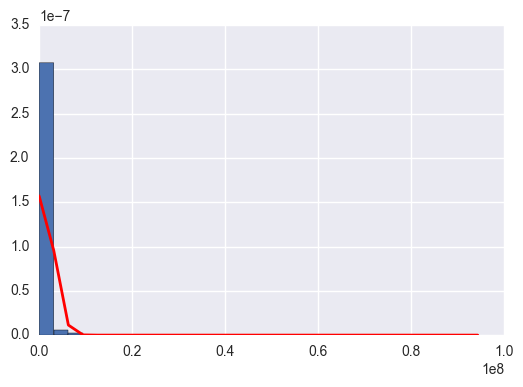

In [21]:
def visualize_normality_for_sample(x):
    #Display the histogram of the samples, along with the probability density function:
    mu =  x.mean()
    sigma = x.std()
    count, bins, ignored = plt.hist(x, 30, normed=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
        np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
    linewidth=2, color='r')
    plt.show()

visualize_normality_for_sample(Y_train)

In [22]:
import scipy.stats as stats
from scipy.stats import mstats

def test_normality(data):
    """
    Tests whether a sample differs from a normal distribution. Returns a 2-tuple of the chi-squared statistic, 
    and the associated p-value. Given the null hypothesis that x came from a normal distribution, 
    If the p-val is very small (alpha level of 0.05 normally), it means it is unlikely that the data came from a normal distribution. 
    Other possible way: normal probab. plot and https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chisquare.html
    """
    # equivalent: print stats.normaltest(data)  
    print "z value and p value: "#, z, pval
    z,pval = mstats.normaltest(data)
    if(pval < 0.05):
        print "Not normal distribution"
    return z, pval
    
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 10000)
print " Normal distrib. test: ",test_normality(s)  #(1.0491016699730547, 0.59182113002186942)
print " Y_train test: ", test_normality(Y_train)

Y_train.shape


 Normal distrib. test:  z value and p value: 
(1.4176249725444574, 0.4922283784874727)
 Y_train test:  z value and p value: 
Not normal distribution
(16758.153738777055, 0.0)


(7983,)

(array([  2.58036245e-07,   4.11689326e-09,   1.42763234e-09,
          4.64810529e-10,   1.32803008e-10,   3.65208273e-10,
          9.96022563e-11,   9.96022563e-11,   6.64015042e-11,
          3.32007521e-11,   3.32007521e-11,   3.32007521e-11,
          3.32007521e-11,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   3.32007521e-11,   0.00000000e+00,
          0.00000000e+00,   3.32007521e-11,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.32007521e-11]),
 array([  7.15300000e+03,   3.78014556e+06,   7.55313812e+06,
          1.13261307e+07,   1.50991232e+07,   1.88721158e+07,
          2.26451084e+07,   2.64181009e+07,   3.01910935e+07,
          3.39640860e+07,   3.77370786e+07,   4.15100712e+07,
          4.52830637e+07,   4.90560563e+07,   5.28290488e+07,
          5.66020414e+07,   6.03750340e+07,   6.41480265e+07,
          6.79210191e+07,   7.16940116e+07,   7.54670042e+07,
          7.92399968e+07,   8.30129893e+07

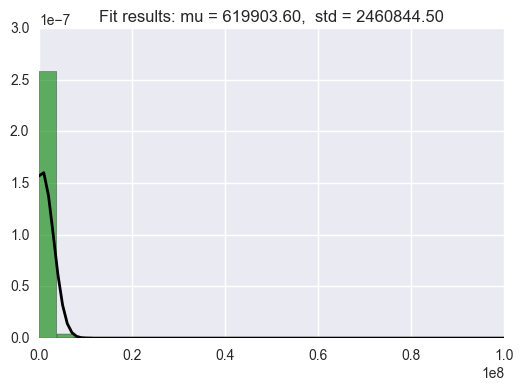

In [23]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
# Generate some data for this demonstration.
#data = norm.rvs(10.0, 2.5, size=500)
data = Y_train

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, normed=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

#plt.plot(bin_edges, scipy.stats.norm.pdf(bin_edges, loc=Y_train.mean(), scale=Y_train.std()))

In [24]:
# make the only categorical feature (row 1) consistent in data types (str)
train['1'] = train['1'].apply(lambda x: str(x)) #train['1'] = train['1'].astype('str')
print train['1'].dtypes  ," and Y type: ", Y_train.dtypes  #train['1'] = train['1'].loc[train['1'].notnull()].astype(int).astype(str)

categorical_features = ['1']
train_dum = f.create_dummy_vars_for_categorical_features(train, categorical_features) 
# dropping non categorical useless features once they have been binarized (one hot encoding)
#train_dum.drop(['0'], axis = 1, inplace = True)
#train_dum.drop(['z-value'], axis = 1, inplace = True)


object  and Y type:  int64
Before dummys:
(7983, 12)   ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11'] 
   0        1        2         3      4       5        6     7      8        9      10      11
0  0    AdMob    73946   5755397   2947   12665    46196   639  10091   854301    8875    6680
1  1   Search  1625476  30183332  22443  364010  1287250  4927  44035  5843319  290910  197941
2  2  YouTube      796    170994    140       0        0    41    351    23160       0       0
3  3    AdMob   267791   7184832   5992   79963   270375  1334  13363  1428950   62518   49256
4  4      GDN     1797     98955     39     998     4400     7    110     9484     998     799
After dummys:
(7983, 7224)   ['0' '1' '2' ..., '1_zmBV' '1_zsC' '1_zxFV'] 
   1_0  1_00451cfe1dc94904746b5cbda3c4db03  1_0082812513bc90d9b0c1857d125e049d5f56a7d4  1_00926c153b38bbad0137552bd0414e17c7ac07f3  1_00a309cc4bef2bc4d42ea937d122a9cf6598e157  1_00c4eb768d38e276d39187a61797e761f00d5c29549d6469ec46344499124306  1_0

### FEATURE SELECTION THROUGH FEATURE CORRELATION
Pearson correlation coefficient ρ -rho- (if it exists, in [-1,1]) does not assume normality, but is only an exhaustive measure of association if the joint distribution is multivariate normal. Given the failed normality test in our case, another option can be using Spearman’s s or Kendall’s tau. Spearman’s rho can be less reliable and interpretable than Kendall’s while Spearman rho is easier to compute).



initial columns  ['0' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11']
cols_to_consider ['2', '4', '5', '6', '7', '8', '9', '10', '11']
Df to perform correlation analysis: 
['2' '4' '5' '6' '7' '8' '9' '10' '11'] 
         2      4       5        6     7      8        9      10      11
0    73946   2947   12665    46196   639  10091   854301    8875    6680
1  1625476  22443  364010  1287250  4927  44035  5843319  290910  197941
2      796    140       0        0    41    351    23160       0       0
3   267791   5992   79963   270375  1334  13363  1428950   62518   49256
4     1797     39     998     4400     7    110     9484     998     799
--------------- CORRELATIONS ---------------
           2         4         5         6         7         8         9        10        11
2   1.000000  0.743127  0.918763  0.899129  0.649821  0.613268  0.727066  0.897125  0.860970
4   0.743127  1.000000  0.746336  0.730530  0.888340  0.836569  0.963483  0.738350  0.723718
5   0.918763  0.746336  1.0000

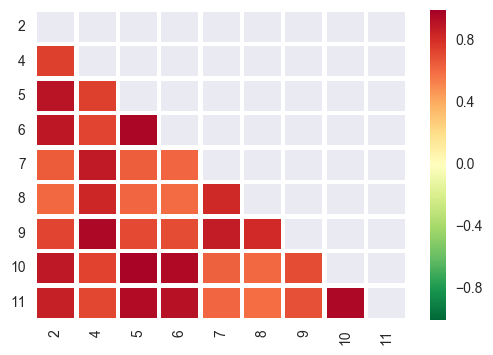

In [25]:
#find_correlated_features(train_dum, 'spearman', cols_to_skip=['3', '0'])
f.visualize_feature_correlations(train_dum, 'spearman', cols_to_skip=['3', '0'])


initial columns  ['0' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11']
cols_to_consider ['2', '4', '5', '6', '7', '8', '9', '10', '11']
Df to perform correlation analysis: 
['2' '4' '5' '6' '7' '8' '9' '10' '11'] 
         2      4       5        6     7      8        9      10      11
0    73946   2947   12665    46196   639  10091   854301    8875    6680
1  1625476  22443  364010  1287250  4927  44035  5843319  290910  197941
2      796    140       0        0    41    351    23160       0       0
3   267791   5992   79963   270375  1334  13363  1428950   62518   49256
4     1797     39     998     4400     7    110     9484     998     799
--------------- CORRELATIONS ---------------
           2         4         5         6         7         8         9        10        11
2   1.000000  0.560801  0.798315  0.772140  0.479241  0.447647  0.546545  0.769079  0.724697
4   0.560801  1.000000  0.572503  0.559252  0.725702  0.659961  0.844375  0.567374  0.557845
5   0.798315  0.572503  1.0000

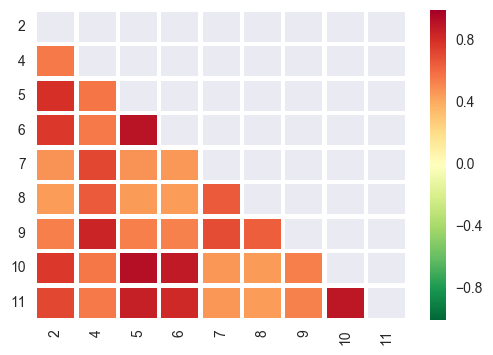

In [26]:
f.visualize_feature_correlations(train_dum, 'kendall', cols_to_skip=['3', '0'])

/Users/natalia/.virtualenvs/keras/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: covariance is not positive-semidefinite.
/Users/natalia/.virtualenvs/keras/lib/python2.7/site-packages/ipykernel/__main__.py:43: RuntimeWarning: covariance is not positive-semidefinite.
/Users/natalia/.virtualenvs/keras/lib/python2.7/site-packages/ipykernel/__main__.py:66: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


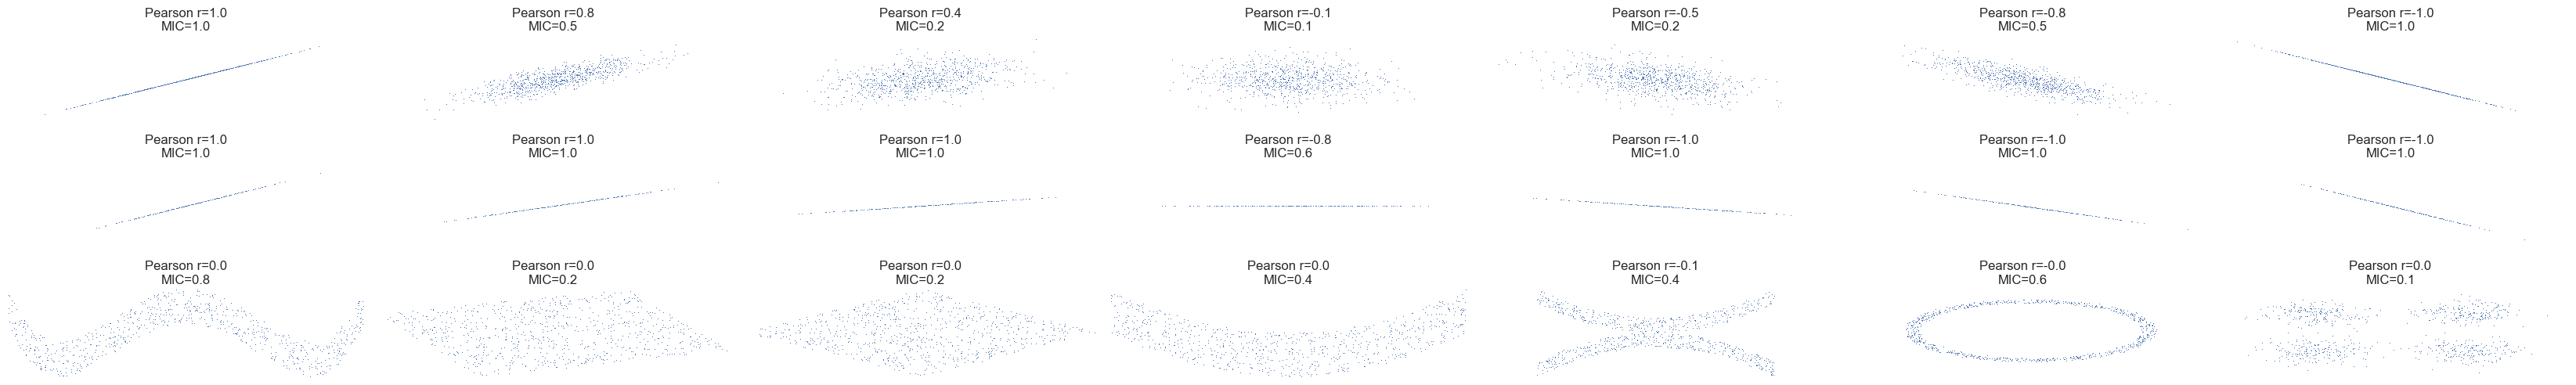

In [27]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from minepy import MINE
# for computing correlation in between categorical features, use Mutual Information coefficient, e.g., using
# package minepy (Maximal Information-based Nonparametric Exploration)

rs = np.random.RandomState(seed=0)

def MIC_plot(x, y, numRows, numCols, plotNum,              
             xlim=(-4, 4), ylim=(-4, 4)):
    # build the MIC (Maximal Information-based Nonparametric Exploration) 
    # and correlation plot using the covariant matrix using a vectorized implementation
    r = np.around(np.corrcoef(x, y)[0, 1], 1)
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(x, y)
    mic = np.around(mine.mic(), 1)
    ax = plt.subplot(numRows, numCols, plotNum,
                     xlim=xlim, ylim=ylim)
    ax.set_title('Pearson r=%.1f\nMIC=%.1f' % (r, mic),fontsize=12)
    ax.set_frame_on(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.plot(x, y, ',')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

def rotation(xy, t):
    return np.dot(xy, [[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])

def mvnormal(n=1000):
    cors = [1.0, 0.8, 0.4, 0.0, -0.4, -0.8, -1.0]
    for i, cor in enumerate(cors):
        cov = [[1, cor],[cor, 1]]
        xy = rs.multivariate_normal([0, 0], cov, n)
        MIC_plot(xy[:, 0], xy[:, 1], 3, 7, i+1)

def rotnormal(n=1000):
    ts = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/2-np.pi/6,
          np.pi/2-np.pi/12, np.pi/2]
    cov = [[1, 1],[1, 1]]
    xy = rs.multivariate_normal([0, 0], cov, n)
    for i, t in enumerate(ts):
        xy_r = rotation(xy, t)
        MIC_plot(xy_r[:, 0], xy_r[:, 1], 3, 7, i+8)

def others(n=1000):
    x = rs.uniform(-1, 1, n)
    y = 4*(x**2-0.5)**2 + rs.uniform(-1, 1, n)/3
    MIC_plot(x, y, 3, 7, 15, (-1, 1), (-1/3, 1+1/3))

    y = rs.uniform(-1, 1, n)
    xy = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)
    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2+np.sqrt(2)) / np.sqrt(2)
    MIC_plot(xy[:, 0], xy[:, 1], 3, 7, 16, (-lim, lim), (-lim, lim))

    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2)
    MIC_plot(xy[:, 0], xy[:, 1], 3, 7, 17, (-lim, lim), (-lim, lim))

    y = 2*x**2 + rs.uniform(-1, 1, n)
    MIC_plot(x, y, 3, 7, 18, (-1, 1), (-1, 3))

    y = (x**2 + rs.uniform(0, 0.5, n)) * \
        np.array([-1, 1])[rs.random_integers(0, 1, size=n)]
    MIC_plot(x, y, 3, 7, 19, (-1.5, 1.5), (-1.5, 1.5))

    y = np.cos(x * np.pi) + rs.uniform(0, 1/8, n)
    x = np.sin(x * np.pi) + rs.uniform(0, 1/8, n)
    MIC_plot(x, y, 3, 7, 20, (-1.5, 1.5), (-1.5, 1.5))

    xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], int(n/4))
    xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], int(n/4))
    xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], int(n/4))
    xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], int(n/4))
    xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
    MIC_plot(xy[:, 0], xy[:, 1], 3, 7, 21, (-7, 7), (-7, 7))

plt.figure(facecolor='white', figsize=(33,5)) 
mvnormal(n=800)
rotnormal(n=200)
others(n=800)
plt.tight_layout()
plt.show()

,0,2,3,4,5,6,7,8,9,10,11
0,0,73946,5755397,2947,12665,46196,639,10091,854301,8875,6680
1,1,1625476,30183332,22443,364010,1287250,4927,44035,5843319,290910,197941
2,2,796,170994,140,0,0,41,351,23160,0,0
3,3,267791,7184832,5992,79963,270375,1334,13363,1428950,62518,49256
4,4,1797,98955,39,998,4400,7,110,9484,998,799


Computing covariance matrix and MIC for features:  ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
Pearson product-moment correlation coefficients np.corrcoef(x= 2 , y= 3 ):  [[ 1.          0.79392723]
 [ 0.79392723  1.        ]]
Pearson product-moment correlation coefficients np.corrcoef(x= 2 , y= 4 ):  [[ 1.          0.76982974]
 [ 0.76982974  1.        ]]
Pearson product-moment correlation coefficients np.corrcoef(x= 2 , y= 5 ):  [[ 1.          0.97473137]
 [ 0.97473137  1.        ]]
Pearson product-moment correlation coefficients np.corrcoef(x= 2 , y= 6 ):  [[ 1.          0.97594607]
 [ 0.97594607  1.        ]]
Pearson product-moment correlation coefficients np.corrcoef(x= 2 , y= 7 ):  [[ 1.          0.74375329]
 [ 0.74375329  1.        ]]
Pearson product-moment correlation coefficients np.corrcoef(x= 2 , y= 8 ):  [[ 1.          0.74101961]
 [ 0.74101961  1.        ]]
Pearson product-moment correlation coefficients np.corrcoef(x= 2 , y= 9 ):  [[ 1.          0.80379601]
 [ 0.80

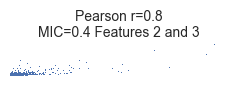

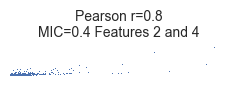

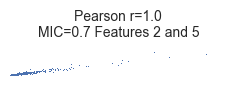

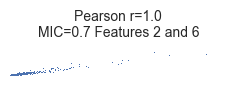

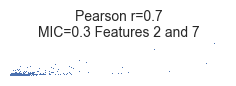

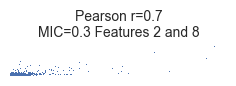

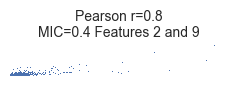

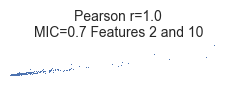

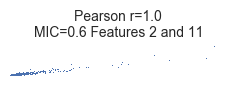

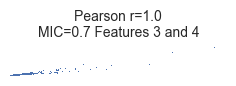

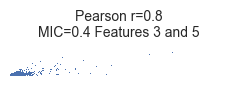

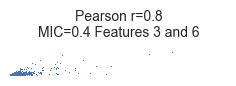

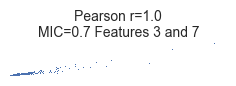

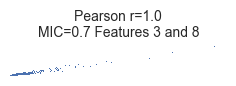

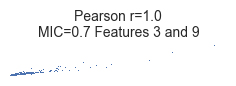

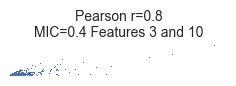

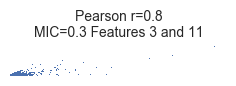

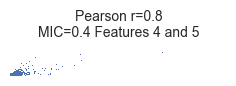

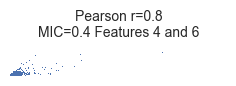

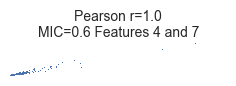

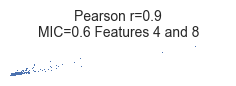

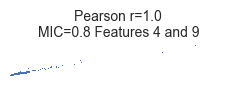

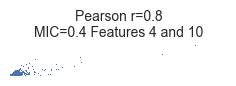

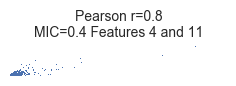

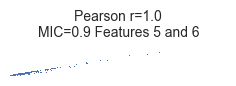

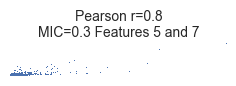

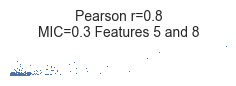

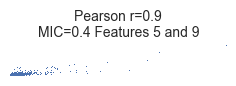

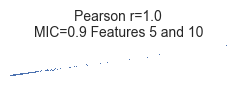

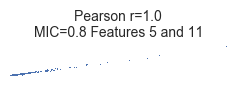

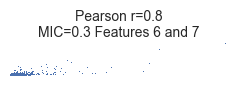

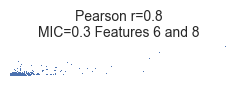

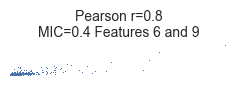

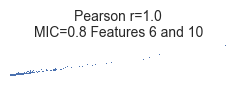

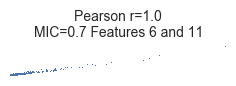

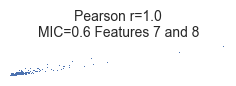

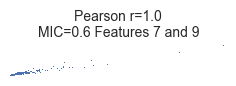

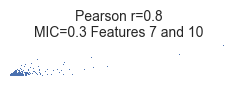

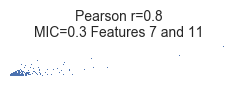

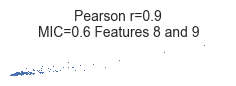

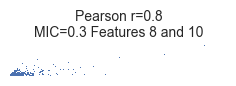

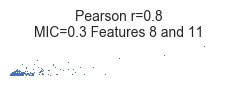

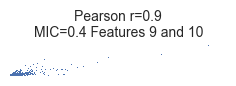

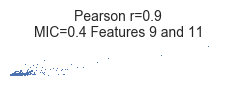

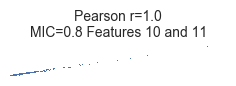

In [28]:
train_dum.head()

def plot_covariance_based_mutual_info_for_categorical_correlations(df, categorical_features = []):
    """ 
    Computes covariance matrix using a vectorized implementation to be used for computing the mutual information
    coefficient
    """
    cols = []
    plot_id = 1
    for c in df.columns:
        if not c.startswith('1_') and c !='0':
            cols.append(c)
    plot_grid_wide = len(cols)#/2
    plot_grid_length = len(cols)#/plot_grid_wide
    print "Computing covariance matrix and MIC for features: ",cols
    for i in range(len(cols)):
        for j in range(len(cols)):
            if j > i and not (cols[i].startswith('1_') and cols[j].startswith('1_')):
                #cov_matrix = np.cov([df[cols[i]], df[cols[j]]], ddof= 0)
                MIC_plot(df[cols[i]], df[cols[j]], plot_grid_wide, plot_grid_length, plot_id, cols[i], cols[j])
                plot_id +=1

    plt.figure(facecolor='white')
    #plt.tight_layout()
    plt.show()

def MIC_plot(x, y, numRows, numCols, plotNum, x_name, y_name, xlim=(-4, 4), ylim=(-4, 4)):
    # build the MIC and correlation plot using the covariant matrix using a vectorized implementation. To be used when
    # categorical features are part of the model (otherwise, Pearson, Kendall and Spearman can be used)
    print "Pearson product-moment correlation coefficients np.corrcoef(x=",x_name,", y=",y_name,"): ",np.corrcoef(x, y)
    r = np.around(np.corrcoef(x, y)[0, 1], 1)  # Pearson product-moment correlation coefficients.
    # TODO: compute cov matrix for each one-hot encoding variable of the categorical feature with 
    # MINE's Mutual Information coefficient

    fig = plt.figure(figsize=(33,5), frameon=False)    
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(x, y)
    mic = np.around(mine.mic(), 1)
    ax = plt.subplot(numRows, numCols, plotNum)#,xlim=xlim, ylim=ylim)
    ax.set_title('Pearson r=%.1f\nMIC=%.1f Features %s and %s' % (r, mic, x_name, y_name),fontsize=10)
    ax.set_frame_on(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.plot(x, y, ',')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

plot_covariance_based_mutual_info_for_categorical_correlations(train_dum)

# Learning Journal: Linear models for predicting success in marketing campaigns

## 1. Describing the dependent variable (column 3) in terms of the count, standard deviation, mean and median values, describing the general shape and whether it can be considered a normal distribution.

```
Feature mean: 619260.213355
Feature std dev: 2460481.30781
Feature std error of the mean: 27540.0172749
Feature median: 160190.0
7982 values for Y train -unique: 7912
```

An idea for finding if data can be considered a normal distribution is doing a 2 hypothesis t-test to compare means. However, an issue that affects a 2 Hypothesis test is whether the data are censored, ie. values from the sample are somehow restricted. Censoring occurs if the range of potential values are limited such that values from one or both tails of the distribution are unavailable (e.g., right and/or left censoring where high and/or low values are missing [3]). This could be an issue to be aware here, since we may cut a campaign from running if it is underperforming for max X days, since we do not want to waste marketing campaign costs so we do not allow it running live more than X days).


Normality tests [5]: 

1) Plotting the histogram for feature in column 3 could give a good picture of normality if we had more data, but a better visual test is the normal probability plot. If the plot is linear, it is consistent with being sampled from a normal distribution (this test help the human eye at detecting linearity versus detecting bell curve)[1].

2) Using both visualisation and scipy.stats.normaltest(data) in method test_normality, we can see that Y_train cannot be considered a normal distribution (confirmed by a p-value of 0.0 given that H0 = “Both distributions are drawn from a normal distribution”. This means that there is statistical significance between the normal distribution and our sample distribution). This method in scipy  is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality. p-value  returned is a 2-sided chi squared probability for the hypothesis test.

3) We may conduct a formal test, the Shapiro-Wilk test, to see whether the data come from a normal distribution. 

H0: The data are sampled from a normal distribution

H1: The data are not sampled from a normal distribution.

A small significant p-value (< 0.05), as shown below, means that we reject the null hypothesis (and conclude that the data is probably not normally distributed).

```
> shapiro.test(rm)
W = 0.9609, p-value = 2.412e-10
```

We see that we reject the null hypothesis that the rm variable was sampled from a normal distribution (W = 0.9609, p-value = 2.412e-10).

## What do we do if the normality assumption fails? 

Here is where the non-parametric test comes in. The Wilcoxon Signed rank test can compare the median to a hypothesized median value. For example, in our case,
```
wilcox.test(dis, mu=3.5) or with with continuity correction:
wilcox.test(dis, mu = 3.5, alternative="less")
wilcox.test(dis, mu=3.5, alternative= "greater")
```

[1] Just because a population has a normal distribution doesn't mean that a random sample drawn from the population will "look" (in a histogram) normal. Of course for large samples the representativeness is more accurate. If the sample is not large enough, examining the histogram may not give the whole picture or allow full detection of "bell-shaped" curve. The normal probability plot tackles this issue.


## Are columns correlated to each other? To Y? Which ones and how to determine the correlation?

Depending on outliers, unequal variances, normality and linearity of features, there are different tests to  compute correlation [12]. Pearson correlation coefficient R is a common one used for finding correlation among features and consequently, eliminate redundant features. We could set a rule to use only in our model those features that have absolute value of Pearson correlation coefficient r > 0.1 (both among original features and a linear combination of features). The sign (close to -1 or close to 1) will indicate the positive or negative correlation on the dependent variable Y.

After normalising categorical feature in column 1, we have 7224 columns. Out of those, 38 have a correlation coefficient of Pearson P larger than abs(0.05) with the dependent variable Y (all of these are the categorical feature). However, Pearson correlation test is only applicable when each dataset is normally distributed, which is not the case for our Y variable [9]. However, Spearman correlation coefficient, on the contrary, is non parametric (its exact sampling distribution can be obtained without requiring knowledge about the parameters of the joint probability distribution of X and Y). Spearman is applicable when X and Y are related by any monotonic function (in contrast to the Pearson correlation, which only is precise when X and Y are related by a linear function)[10]. Spearman’s Rho is considered as the regular Pearson’s correlation coefficient in terms of the proportion of variability accounted for, whereas Kendall’s Tau represents a probability, i.e., the difference between the probability that the observed data are in the same order versus the probability that the observed data are not in the same order [12]. Therefore I provide a grid plot on both Kendall and Spearman correlation coefficients.

For the categorical features, correlation per se is not adequate, and we compute for each pair of features, its covariance matrix using a vectorized implementation that allows to compute instead the the mutual information coefficient (MIC). This method MIC_plot shows features with high correlation for those values of MIC closer to 1.

Once detected highly correlated features, one can do:
PCA (using grid search on hyper parameters of the model selection like the # of components in PCA) and they will be naturally gone, or 
Choose the conjugates coordinates, meaning if x and y are highly correlated choose r= (x+y)/2 and s = (x-y)/2 then r is effectively representing one of them while s is representing the deviation of one from the other. Otherwise, the main feature to attend is how removing or adding these redundant features affects the CV score. 


## 2. Looking at Y (Column 3 in the test data), what regression models should one first and what are the pros and cons of each? 

In terms of regression algorithms, options are, as a summary of the most popular regression algorithms:
<li> Ordinary Least Squares Regression (OLSR)
<li> Linear Regression
<li> Logistic Regression
<li> Stepwise Regression
<li> Multivariate Adaptive Regression Splines (MARS)
<li> Locally Estimated Scatterplot Smoothing (LOESS)
<li> Polynomial Regression
<li> Ridge Regression
<li> Lasso Regression
<li> ElasticNet Regression

1) Linear regression: alone suffers from multicollinearity and is sensitive to outliers. Solved with ordinary least squares.

2) Mixed model regression with condition as a fixed effect on different features and maybe date as a random effect (to estimate and remove variability due to events going on outside of our control, like school holidays or weekends, etc. to improve the chance of observing a difference and to better estimate the predictor Y).

3) Polynomial regression: makes a linear estimation by fitting a nonlinear model to the data (when linear relations among variables may not hold and we will have a more complex model with a second term for x such as y = a0 + bx + cx^2). Non-linear least squares can be used.

4) Maximum likelihood estimation (MLE), a special case of Maximum a posteriori (MAP, which ignores the priors and therefore is unregularized). It is a parametric method requiring mean and variance of an assumed normally distributed variable. 

5) Gradient descent and stochastic gradient descent (including random samples out of all the set). In order to model a set of points using a line defined by two parameters, gradient descent attempts to find the best values for the line's slope m, and y-intercept b parameters, subject to an error function.

6) Other types of regression: Bayesian (using conditional distribution and errors that have a normal distribution, assumes a prior distribution to obtain a posterior probability distribution), Ecological and Robust regression (designed to be not overly affected by violations of assumptions by the underlying data-generating process of other methods). Bayesian regression uses the conditional probabilities and ordinary least squares to estimate the coefficient vector using the Moore-Penrose pseudoinverse.

I would try linear regression models first of all. In order to prevent overfitting, I would apply three different kinds of regularization techniques:

a) Lasso or L1 regularizer

b) Ridge regression or L2 regularizer

c) a weighted balance of L1 and L2 regularizers through Elastic Net regularizer. This method, although takes longer training time and is less maintainable in time, provides the best compromise of both kinds of L1 and L2 regularization techniques.

Ridge regression can't zero out coefficients and thus, you either end up including all the coefficients in the model, or none of them" [4]. However, LASSO does both parameter shrinkage and variable selection automatically. If some of your covariates are highly correlated, Elastic Net may be better instead of the LASSO. Another approach is using the Non-Negative Garotte (NNG) [1] as it's consistent in terms of estimation and variable selection [2]. Unlike LASSO and ridge regression, NNG requires an initial estimate that is then shrunk towards the origin. In the original paper, Breiman recommends the least-squares solution for the initial estimate (you may however want to start the search from a ridge regression solution and use something like GCV to select the penalty parameter) [3]" [4]
Ridge regression and Lasso are subset selection methods or shrinkage methods that use least squares to fit a linear model that contains a subset of predictors. Shrinking the coefficient estimates towards zero can significantly reduce the model's variance. Lasso uses an L1 norm penalty of the coefficient vector while Ridge uses an L2 norm.  Cross validation for an optimal lambda value election is critical for performance of these models. 

Because the standard least squares coefficient estimates are scale equivariant, the ridge regression coefficient estimates can change substantially when multiplying a given predictor by a constant, due to the sum of squared coefficients term in the penalty part of the ridge regression objective function. Therefore, it is best to apply ridge regression after standardizing the predictors [7]. Both methods shrink the coefficient estimates towards zero, however, in Lasso, the L1 penalty forces some coefficient estimates to be zero when the tuning parameter λ is large enough. 


    
Apart from regular grid-search fine-tuning for optimal configuration of the regularization parameters, I would also run a random forest regressor and use the built-in out-of-bag scoring feature for random forest regressor as a manner of applying bootstrapping to the model [6]

Other models one could try are mixed effect models where there would be some random components to capture external factors that are not possible to observe or quantify, 
and account for seasonality effects, holiday "playing" times, holiday periods when users are more receptive to play games, outside school time/exams time fluctuations, etc.


## How to measure the accuracy and validate the robustness of a model?

Cross validation is the general assessment model procedure. Depending on the model one or other metric will be looked at. 

### 1. In linear regression models normally one computes the coefficient of determination R^2, but also the adjusted R^2, error term, the statistical significance of each feature and Mallow’s Cp criterion  can be used. The latter compares precision and bias of the full model to models with a subset of predictors. R^2 provides a way to quantitatively measure how well the model explains the data [11].  To compare the ground truth target values with predicted target values by the random forest regressor, scikit-learn doesn't use the MSE but R2 or coefficient of determination #r2_score() computes the coefficient of determination R2, whose best possible score is 1.0, and lower values are worse.

R-squared is the “percent of variance explained” by the model [8] or fraction by which the variance  of the errors is less than the variance of the dependent variable. Therefore, from all models tried with different regularization methods, I would keep the one producing best (closer to 1) coefficient of determination R^2 [4].

Other criteria for measuring the relative quality of statistical models are Akaike Information criterion (AIC) (assessed by likelihood function) and the Bayesian Information Criterion (AIC) or Schwarz criterion (SBIC), which is used for model selection among a set of them (lower BIC is preferred). 

[1] Breiman, L. Better Subset Regression Using the Nonnegative Garrote Technometrics, 1995, 37, 373-384

[2] Yuan, M. & Lin, Y. On the non-negative garrotte estimator Journal of the Royal Statistical Society (Series B), 2007, 69, 143-161

[3] Zou, H. & Hastie, T. Regularization and variable selection via the elastic net Journal of the Royal Statistical Society (Series B), 2005, 67, 301-320

[4] http://stats.stackexchange.com/questions/866/when-should-i-use-lasso-vs-ridge

[5] Breiman, Leo. Out-of-bag estimation. Technical report, Statistics Department, University of California Berkeley, 1996b. 33, 34.

[6] OOB estimation http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

[7] https://lagunita.stanford.edu/c4x/HumanitiesScience/StatLearning/asset/model_selection.pdf

[8] RandomForestRegressor score() returns the coefficient of determination R^2 of the prediction, defined as (1 - u/v), where u is the regression sum of squares ((y_true - y_pred) ** 2).sum() and v is the residual sum of squares ((y_true - y_true.mean()) ** 2).sum(). Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

[9]  http://www.statsoft.com/textbook/glosp.html#Pearson%20Correlation

[10] Pearson's ρ does not assume normality, but is only an exhaustive measure of association if the joint distribution is multivariate normal. Given the failed normality test in our case, another option can be using Spearman’s s or Kendall’s tau. Spearman’s rho can be less reliable and interpretable than Kendall’s while Spearman rho is easier to compute) [Kendall & Gibbons, 1990].

[11] R^2 is measurable using scoring function 'r2' as follows:

```
# LINEAR REGRESSION
lr = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)
score_lr = cross_val_score(lr, x, y, cv=5, scoring='r2')
alpha_vals = [0.1, 0.3, 1.0] # lasso, ridge (alpha in [0,1])
```


```
# LINEAR REGRESSION LASSO Regularization
la = Lasso(alpha=a, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
score_la = cross_val_score(la, train, y, cv=5, scoring='r2')
```


```
# LINEAR REGRESSION RIDGE Regression
ri = Ridge(alpha=a, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
score_ri = cross_val_score(ri, train_all, y, cv=5, scoring='r2')
```

[12] http://www.unesco.org/webworld/idams/advguide/Chapt4_2.htm



### 2. To measure the accuracy and validate the robustness of the model, some goodness-of-fit tests are:

-Chi-square test for continuous and discrete distributions;

-Kolmogorov-Smirnov test for continuous distributions based on the empirical distribution function (EDF);

-Anderson-Darling test for continuous distributions: http://www.oswego.edu/~srp/stats/npp_small.htm
Specially the latter, is well suited when the sample size is small, and a histogram does not provide very accurate insights regarding normality (see histograms in notebook).

[1] The Standard Normal curve, shown here, has mean 0 and standard deviation 1. If a dataset follows a normal distribution, then about 68% of the observations will fall within  of the mean , which in this case is with the interval (-1,1). About 95% of the observations will fall within 2 standard deviations of the mean, which is the interval (-2,2) for the standard normal, and about 99.7% of the observations will fall within 3 standard deviations of the mean, which corresponds to the interval (-3,3) in this case. Although it may appear as if a normal distribution does not include any values beyond a certain interval, the density is actually positive for all values, . Data from any normal distribution may be transformed into data following the standard normal distribution by subtracting the mean  and dividing by the standard deviation. http://www.stat.yale.edu/Courses/1997-98/101/normal.htm

[2] https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.normaltest.html

[3] Goodness-of-fit techniques  D'Agostino & Stephens (1986).

[4] R2 is a statistic that will give some information about the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression line approximates the real data points. An R2 of 1 indicates that the regression line perfectly fits the data. Values of R2 outside the range 0 to 1 can occur where it is used to measure the agreement between observed and modeled values and where the "modeled" values are not obtained by linear regression and depending on which formulation of R2 is used. 

[5] Normality tests: http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R4_One-TwoSampleTests-ANOVA/R4_One-TwoSampleTests-ANOVA2.html


    
## Other methods for model accuracy improvement 


In order to improve the accuracy of the model, I would use  some of the common feature selection strategies below to identify and remove unneeded irrelevant and redundant attributes from data that do not contribute to the accuracy of a predictive model:
a) Filter Methods to score-ranking each feature:  Chi squared test, information gain and correlation coefficient scores.

b) Wrapper Methods that select a set of features as a search problem, to find the best set of features with e.g. stochastic methods such as random hill-climbing algorithm, for instance, the recursive feature elimination algorithm.

c) Embedded Methods (into the model), which learn the contribution of each attribute within the model fitting phase, e.g. regularization methods.

d) Perform feature analysis for feature significance and feature relevance using University of Washington Lime package

More concretely in Python scikit-learn, I would use:

-Recursive Feature Elimination (obtains support and ranking for each feature via rfe.support_ and rfe.ranking_ where RFE is a sklearn.features_selection RFE class and model is a (logistic) regression model)


-Feature importance ranking (model.feature_importances_ where model is a ExtraTreesClassifier object rfe = RFE(model, n_features)).

After applying correlation coefficient score and removing features highly correlated, we can improve the linear regressor by including extra features by multiplying some of the most predictive ones and creating non-linear features in this way that can improve the predictive power of the model. Other strategies to try are removing correlated features among themselves or less predictive, visualising the data to find the right model or apply PCA to remove co-linearity.